# Task#1: Problem Statement


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=19BuQ5m0xZWC7vQN4jX9lukmJ4aE0EkL8)

![alt text](https://drive.google.com/uc?id=10tbeSkGZ0xdHtqTGhYwHhb9PPURw0BfD)

# Task#2: Importing Libraries and Dataset

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
X_Ray_Directory=r"C:\Users\mmanasanjani\Desktop\Extra\MK\DSB\Data+Science+for+Business+Package\Data Science for Business Package\4. Operations Department\Dataset"

In [6]:
os.listdir(X_Ray_Directory)

['0', '1', '2', '3']

In [2]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation  
image_generator=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
# Generate batches of 40 images
# Total number of images is 133*4 = 532 images
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing

train_generator=image_generator.flow_from_directory(batch_size=40,directory=X_Ray_Directory,shuffle=True,target_size=(256,256),class_mode="categorical",subset="training")

Found 428 images belonging to 4 classes.


In [8]:
validation_generator=image_generator.flow_from_directory(batch_size=40,directory=X_Ray_Directory,shuffle=True,target_size=(256,256),class_mode="categorical",subset="validation")

Found 104 images belonging to 4 classes.


In [9]:
#Generate batch of 40 images and labels
train_images,train_labels=next(train_generator)

In [10]:
train_images.shape

(40, 256, 256, 3)

In [11]:
train_labels.shape

(40, 4)

In [12]:
train_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]],

In [13]:
#labels Translator
label_names={0:'Covid-19',1:'Normal',2:'Viral Pneumonia',3:'Bacterial Pneumonia'}

# Task#3: Visualize Dataset

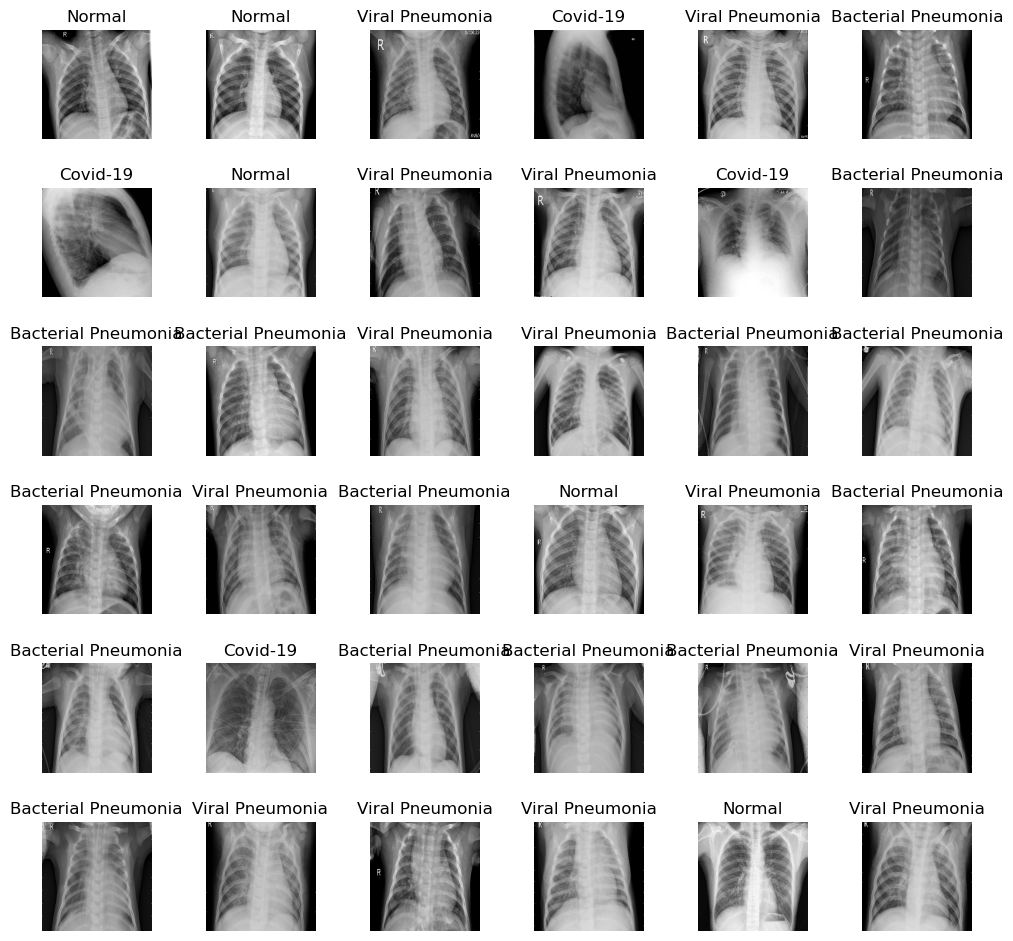

In [15]:
L=6
W=6

fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# Task#4: Import Model with Pre-Trained weights

In [16]:
basemodel=ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(256,256,3))) #download pre-trained model trained on ImageNet(contains of millions of images) dataset, include top--> classification head, not needed,so false

94765736/94765736 [==============================] - 12s 0us/step


In [17]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 64, 64, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 32, 32, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 32, 32, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 32, 32, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 16, 16, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 16, 16, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 16, 16, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 16, 16, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 16, 16, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 8, 8, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [18]:
#freezing top layers in model, keep last layers trainable
for layer in basemodel.layers[:-10]:
    layers.trainable=False

# Task#5: Build and Train Deep Learning Model

In [36]:
headmodel=basemodel.output
headmodel=AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel=Flatten(name='flatten')(headmodel)
headmodel=Dense(256,activation='relu')(headmodel)
#to avoid overfitting, dropout is used,for better generalization, randomly drop 20-30 percent of neurons to remove any co-dependency
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(256,activation='relu')(headmodel)
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(4,activation='softmax')(headmodel)#4-> number of outputs, activation function--> cannot add relu(continuous, for saturated output--> softmax)

In [37]:
model=Model(inputs=basemodel.input,outputs=headmodel)

In [38]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['accuracy'])

In [39]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 64, 64, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 32, 32, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 32, 32, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 32, 32, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 16, 16, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 16, 16, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 16, 16, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 16, 16, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 16, 16, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 8, 8, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [40]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
early_stopping=EarlyStopping(monitor='val_loss',mode='min',patience=20)

# save the best model with lower validation loss
checkpointer=ModelCheckpoint(filepath='weights.hdf5',verbose=1,save_best_only=True)

In [41]:
train_generator=image_generator.flow_from_directory(batch_size=4,directory=X_Ray_Directory,shuffle=True,target_size=(256,256),class_mode='categorical',subset='training')

Found 428 images belonging to 4 classes.


In [42]:
val_generator=image_generator.flow_from_directory(batch_size=4,directory=X_Ray_Directory,shuffle=True,target_size=(256,256),class_mode='categorical',subset='validation')

Found 104 images belonging to 4 classes.


In [44]:
history=model.fit_generator(train_generator,epochs=5,validation_data=val_generator,callbacks=[checkpointer,early_stopping]) #can change epochs to 25 for higher accuracy, better test accuracy

Epoch 1/5


C:\Users\mmanasanjani\AppData\Local\Temp\ipykernel_30052\736342199.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=5,validation_data=val_generator,callbacks=[checkpointer,early_stopping])


107/107 [==============================] - ETA: 0s - loss: 0.2386 - accuracy: 0.9182
Epoch 1: val_loss improved from inf to 1.63345, saving model to weights.hdf5
107/107 [==============================] - 301s 3s/step - loss: 0.2386 - accuracy: 0.9182 - val_loss: 1.6334 - val_accuracy: 0.3558
Epoch 2/5
107/107 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9790
Epoch 2: val_loss improved from 1.63345 to 1.16157, saving model to weights.hdf5
107/107 [==============================] - 291s 3s/step - loss: 0.0607 - accuracy: 0.9790 - val_loss: 1.1616 - val_accuracy: 0.4712
Epoch 3/5
107/107 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9650
Epoch 3: val_loss did not improve from 1.16157
107/107 [==============================] - 289s 3s/step - loss: 0.1499 - accuracy: 0.9650 - val_loss: 1.3391 - val_accuracy: 0.6635
Epoch 4/5
107/107 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9813
Epoch 4: val_loss improved fr

# Task#6: Evaluate Trained Deep Learning Model

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Training Accuracy and Loss')

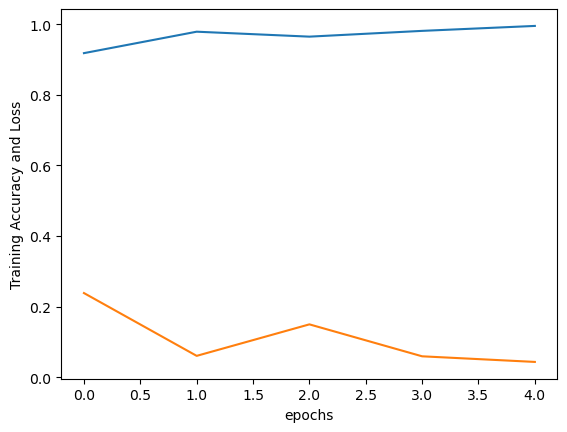

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Training Accuracy and Loss')

Text(0, 0.5, 'Validation Accuracy and Loss')

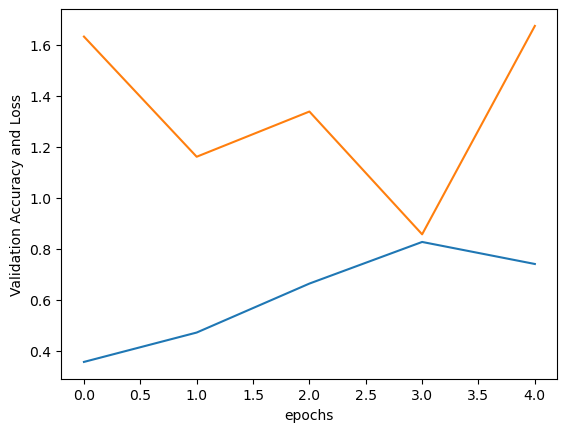

In [49]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy and Loss')

Text(0, 0.5, 'Validation Accuracy')

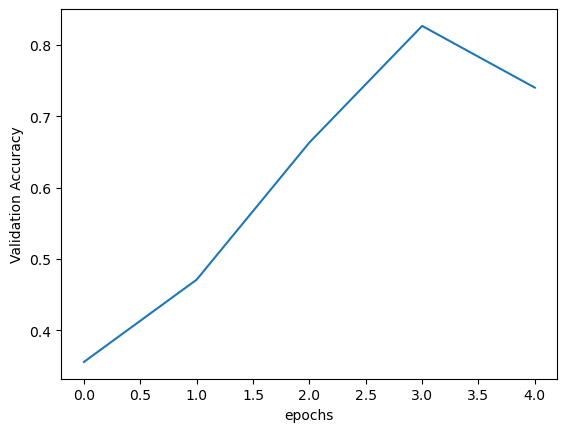

In [50]:
#plotting validation accuracy and loss separately
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy')

Text(0, 0.5, 'Validation Accuracy and Loss')

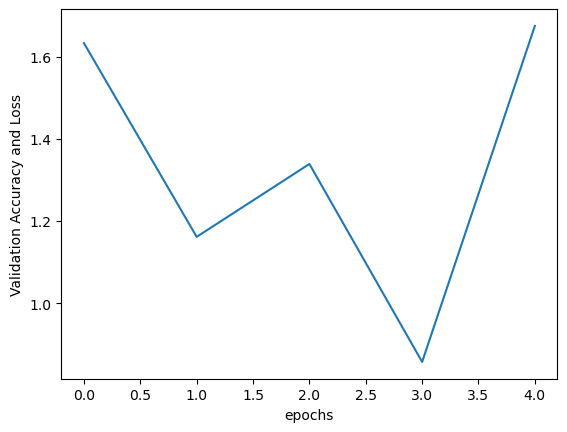

In [51]:
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy and Loss')

In [53]:
test_directory=r'C:\Users\mmanasanjani\Desktop\Extra\MK\DSB\Data+Science+for+Business+Package\Data Science for Business Package\4. Operations Department\Test'

In [56]:
test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_directory(batch_size=40,directory=test_directory,shuffle=True,target_size=(256,256),class_mode='categorical')

Found 40 images belonging to 4 classes.


In [57]:
evaluate=model.evaluate_generator(test_generator,steps=test_generator.n//4,verbose=1)
print('Accuracy Test: {}'.format(evaluate[1]))

C:\Users\mmanasanjani\AppData\Local\Temp\ipykernel_30052\1042355628.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate=model.evaluate_generator(test_generator,steps=test_generator.n//4,verbose=1)


10/10 [==============================] - 8s 49ms/step - loss: 1.5212 - accuracy: 0.7750
Accuracy Test: 0.7749999761581421


In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

prediction=[]
original=[]
image=[]

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory,str(i))):
        img= cv2.imread(os.path.join(test_directory,str(i),item))
        img = cv2.resize(img,(256,256))
        image.append(img)
        img = img / 255
        img = img.reshape(-1,256,256,3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

1/1 [==============================] - 0s 219ms/step


In [59]:
score=accuracy_score(original,prediction)
print('Test Accuracy: {}'.format(score))

Test Accuracy: 0.75


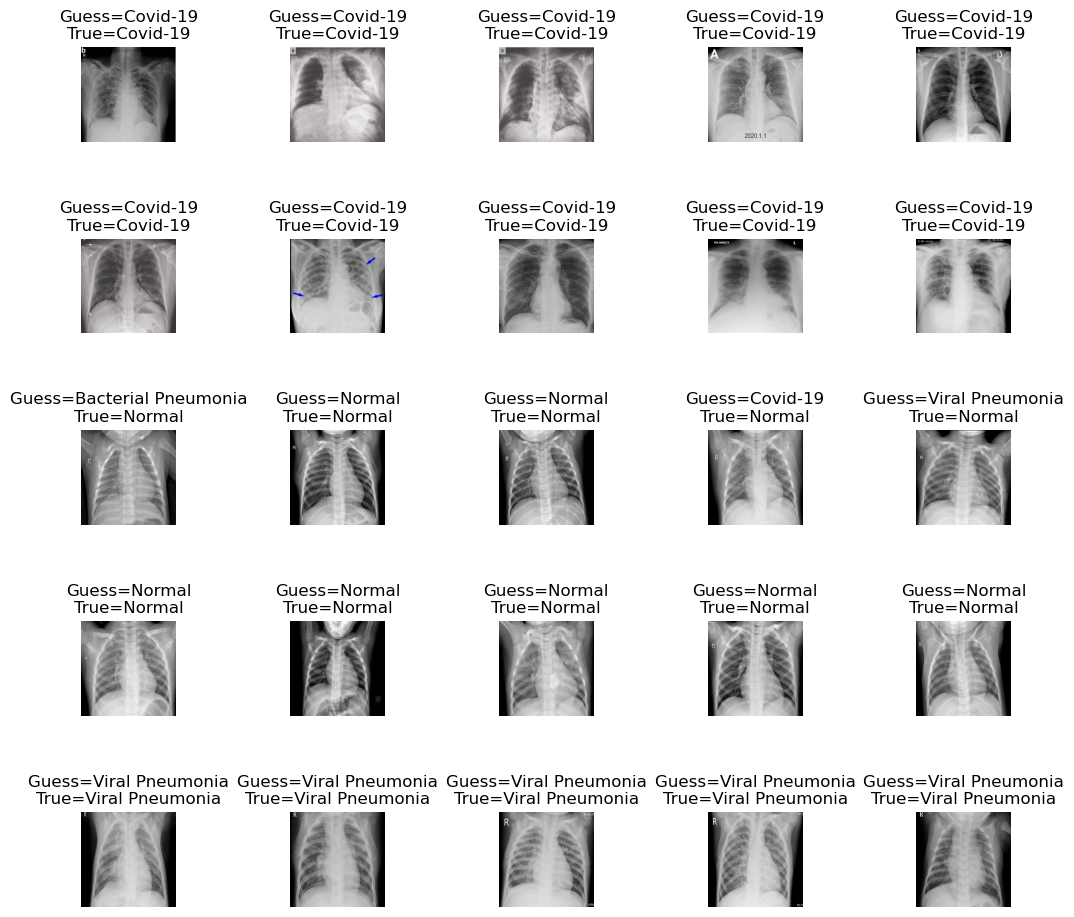

In [60]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2) 

In [62]:
print(classification_report(np.asarray(original),np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10
           2       0.67      0.60      0.63        10
           3       0.64      0.70      0.67        10

    accuracy                           0.75        40
   macro avg       0.77      0.75      0.75        40
weighted avg       0.77      0.75      0.75        40



Text(0.5, 1.0, 'Confusion_matrix')

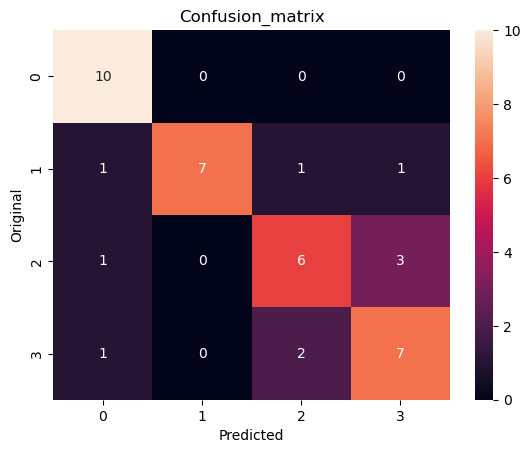

In [63]:
#print confusion matrix
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')